#Notebook for scraping internet to collect required images along with augmentations technique we can use for dataset generation.

Libraries used

1)google_images_download

2)albumentations

Task: Identify Allianz logo from uploaded images

I will be using Google Colab for developing my solution.

1)Dataset Creation

  Our objective is to create a  dataset which contains Logo of Allianz.

Approach we follow:

   1)web scrap images of documents with Allianz logo  from google with the help of  different keywords   like `  using "Allianz logo".

   2)Annotate this images using Label-Studio open source python library and  create an dataset.

   3)Since  collecting and annotating more images is time consuming and requires manual effort I will be  creating a large dataset from annotated small dataset using image augmentations techniques. 

   For creating augmented dataset we will take each annotated image and
   crop the annotated logo region and paste the same  logo in different orrientation in different parts of the image along with some image transformation from Albumentations library in python.
  
We will take the bounding box cordinates for each image and create an annotated dataset in COCO format for training the model.


  


Installing necessary packages

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git


In [ ]:
%cd /content/google-images-download 

/content/google-images-download


In [ ]:
!python setup.py install

In [ ]:
%cd /content/

/content


In [ ]:
# Function to download images
import os
def dwnload_images(keyword,output_img_folder,output_zip_folder):
  command=f"python /content/google-images-download/google_images_download/google_images_download.py --keywords '{keyword}' --limit {num_images}"
  os.system(command)
  command_zip=f"zip -r '{output_zip_folder}' '{output_img_folder}'"
  os.system(command_zip)
  return f"{output_zip_folder}"

In [ ]:
keyword=r"Allianz insurance notices"
#keyword=r"Allianz insurance forms"
#keyword=r"allianz pet insurance form"
num_images=10
output_img_folder=f"/content/downloads/{keyword}"
output_zip_folder=f"/content/AllianzLogo_{keyword}.zip"
dwnload_images(keyword,output_img_folder,output_zip_folder)

'/content/AllianzLogo_Allianz insurance notices.zip'

Output zip folder with images created

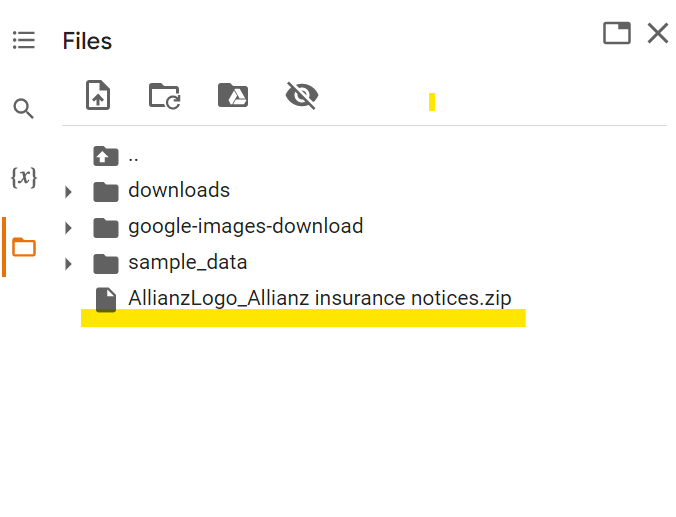

2)We will annotate downloaded images using Label Studio as shown below.

we will using annotated dataset of COCO format for training our dataset.

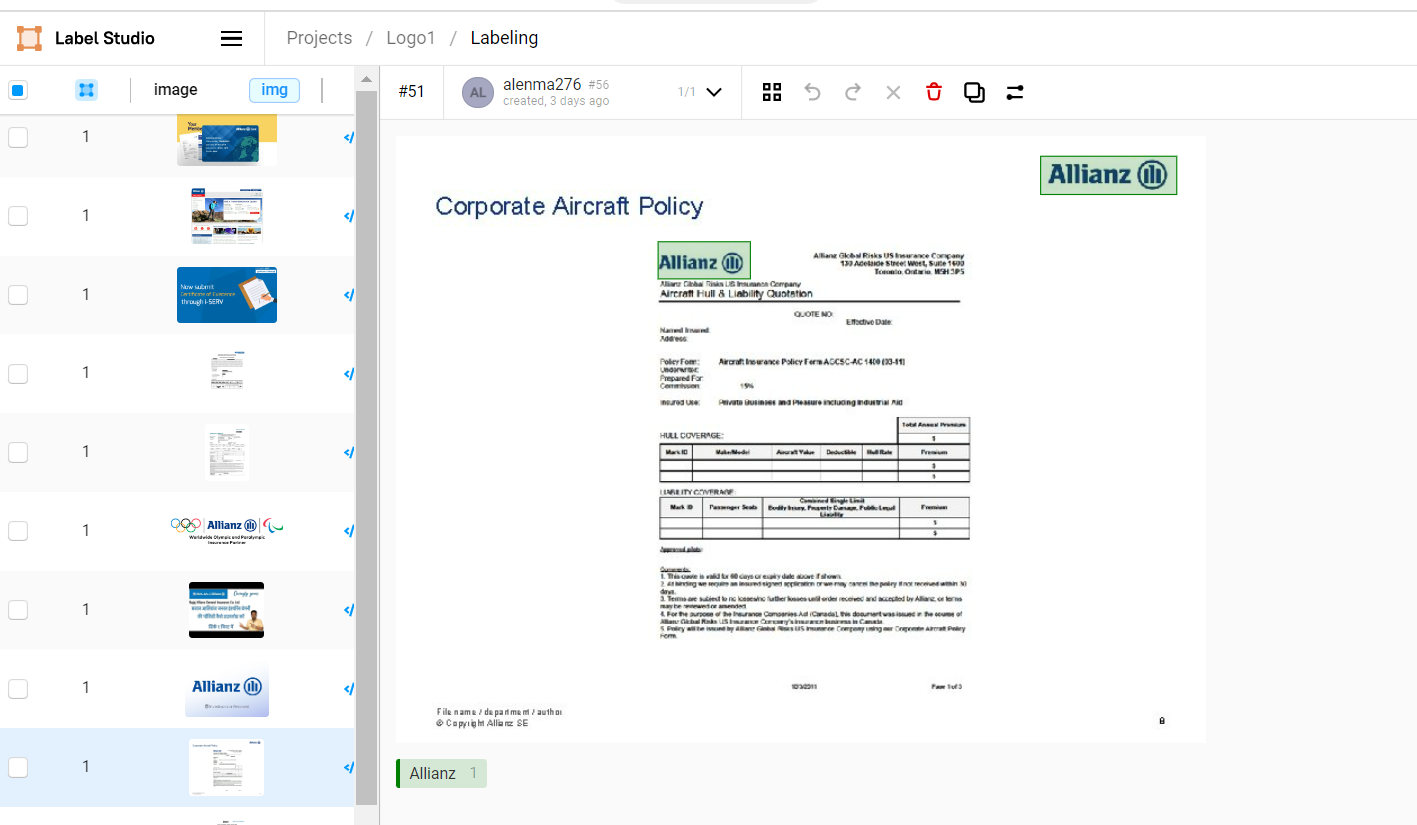

Downloaded annotated dataset in COCO format from Label-Studiowill be in below format.

In [ ]:
 {
 	"images": [{
 		"width": 1200,
 		"height": 1697,
 		"id": 0,
 		"file_name": "images\\9/47314437-0af4724b-3.fake-certificate-xprofit-ltd.jpg"
 	}],
 	"categories": [{
 		"id": 0,
 		"name": "Allianz"
 	}],
 	"annotations": [{
 			"id": 0,
 			"image_id": 0,
 			"category_id": 0,
 			"segmentation": [],
 			"bbox": [
 				251,
 				1194,
 				190,
 				36
 			],
 			"ignore": 0,
 			"iscrowd": 0,
 			"area": 6840
 		},
 		{
 			"id": 1,
 			"image_id": 0,
 			"category_id": 0,
 			"segmentation": [],
 			"bbox": [
 				486,
 				1007,
 				179,
 				19
 			],
 			"ignore": 0,
 			"iscrowd": 0,
 			"area": 3401
 		}
 	],
 	"info": {
 		"year": 2022,
 		"version": "1.0",
 		"description": "",
 		"contributor": "Label Studio",
 		"url": "",
 		"date_created": "2022-06-11 21:26:00.757331"
 	}
 }

{'annotations': [{'area': 6840,
   'bbox': [251, 1194, 190, 36],
   'category_id': 0,
   'id': 0,
   'ignore': 0,
   'image_id': 0,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 3401,
   'bbox': [486, 1007, 179, 19],
   'category_id': 0,
   'id': 1,
   'ignore': 0,
   'image_id': 0,
   'iscrowd': 0,
   'segmentation': []}],
 'categories': [{'id': 0, 'name': 'Allianz'}],
 'images': [{'file_name': 'images\\9/47314437-0af4724b-3.fake-certificate-xprofit-ltd.jpg',
   'height': 1697,
   'id': 0,
   'width': 1200}],
 'info': {'contributor': 'Label Studio',
  'date_created': '2022-06-11 21:26:00.757331',
  'description': '',
  'url': '',
  'version': '1.0',
  'year': 2022}}

For creating augmented dataset we will take each annotated image and crop the annotated logo region and paste the same  logo in different parts of the image along with some transforms from Albumentations library in python

In [ ]:
#Function for rotate image 
cropped_logo_folder="/content/cropped_logo_folder"
from pathlib import Path
from PIL import Image
def rotate_picture_90_left(file_name):
    image = Image.open(file_name)
    rotated_image = image.transpose(Image.ROTATE_90)
    return rotated_image

In [ ]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White
from math import ceil
from PIL import Image, ImageDraw
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path
cropped_logo_folder="/content/cropped_logo_folder"
def crop_transpose_img(img, bbox,croped_path,croped_path_transpose, color=BOX_COLOR, thickness=2, **kwargs):
    img=Image.open(img)
    line_width=5
    img=np.asarray(img)
    #cv2_imshow( img)
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cropped_image = img[ceil(y_min)+line_width:ceil(y_max)+line_width, ceil(x_min)+line_width:ceil(x_max)+line_width,:3]        
    cv2.imwrite(croped_path, cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))
    img_transpose=rotate_picture_90_left(croped_path)
    cv2.imwrite(croped_path_transpose, cv2.cvtColor(np.array(img_transpose), cv2.COLOR_RGB2BGR))
    #cv2.imwrite("bbox.jpg",img)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    #cv2.imwrite('/content/contour1.png', cropped_image)
    img_transpose = cv2.cvtColor(np.array(img_transpose), cv2.COLOR_RGB2BGR)
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    print(f"Cropped logo image") ,cv2_imshow(cropped_image)
    print("Transposed logo image"), cv2_imshow(img_transpose)
    print(f"Orginal image along with annotated bbox")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    cv2_imshow( img)
    

    return img


In [ ]:
import cv2
import os
from pathlib import Path
import numpy as np
from google.colab.patches import cv2_imshow
#crop_img = cv2.imread('/content/contour1.png')
def augmented_dataset_generate(input_imgpath,cropped_img_path,list_bb_cocc,folder_path,id_number,img_id):
  crop_img=cv2.imread(cropped_img_path)
  org_img = cv2.imread(input_imgpath)
  x_upper_left=list_bb_cocc[0]
  y_upper_left=list_bb_cocc[1]
  width=list_bb_cocc[2]
  height=list_bb_cocc[3]
  crop_img_shape=crop_img.shape
  print(f"crop_img_shape {crop_img_shape}")
  print(org_img.shape)
  org_img_copy = org_img.copy()
  # replace values at coordinates (100, 100) to (399, 399) of img3 with region of img2
  #img3[300:366,300:557,:] = img2[0:66,0:257,:]

  #x_min, x_max, y_min, y_max,(381, 534, 714, 768)
  #org_img_copy[714:714+54,381:381+153:] = crop_img[0:54,0:153,:]
  print(y_upper_left,y_upper_left+height,x_upper_left,x_upper_left+width,0,crop_img_shape[1],0,crop_img_shape[0])
  org_img_copy[y_upper_left:y_upper_left+height,x_upper_left:x_upper_left+width,:]=crop_img[0:crop_img_shape[0],0:crop_img_shape[1],:]
  #img3[xmin:xmin+width,ymin:ymin+height]= img2[0:66,0:257,:]
  #img3[xmin:ymin,idth:+height]= img2[0:66,0:257,:]
  out_path=os.path.join(folder_path,f"{img_id}_{id_number}__{Path(input_imgpath).name}")
  cv2.imwrite(out_path, cv2.cvtColor(np.array(org_img_copy), cv2.COLOR_RGB2BGR))
  #cv2.imwrite(out_path, cv2.cvtColor(np.array(org_img_copy), cv2.COLOR_RGB2BGR))
  cv2.imwrite(out_path,org_img_copy)
  print(f"cv2_imshow {cv2_imshow}")
  cv2_imshow( org_img_copy)

In [ ]:
categories= [{'id': 0, 'name': 'Allianz'}]
info={'contributor': 'Label Studio',
  'date_created': '2022-06-09 07:44:26.656952',
  'description': '',
  'url': '',
  'version': '1.0',
  'year': 2022}
def add_differ_annotate_coco(base_annotation,bbox,id,file_name,height,width):
  base_annotation["images"].append({"width": width, "height": height, "id": id, "file_name": file_name})
  base_annotation["annotations"].append({"id": id, "image_id": id, "category_id": 0, "segmentation": [], "bbox": bbox, "ignore": 0, "iscrowd": 0, "area": height*width})
  return base_annotation
def add_annotation(base_annotation,bbox,id,height,width):
  #base_annotation["images"].append({"width": width, "height": height, "id": id, "file_name": file_name})
  base_annotation["annotations"].append({"id": id, "image_id": id, "category_id": 0, "segmentation": [], "bbox": bbox, "ignore": 0, "iscrowd": 0, "area": height*width})
  return base_annotation

In [ ]:
import json
coco_annot_path="/content/LabelStudioAnnotations.json"
with open(coco_annot_path,"r") as f:
  org_coco_annot=json.loads(f.read())
org_coco_annot

{'annotations': [{'area': 8262,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []}],
 'categories': [{'id': 0, 'name': 'Allianz'}],
 'images': [{'file_name': '/content/15d73cc8-12.pet-policy-document-0619.copy.jpeg',
   'height': 796,
   'id': 45,
   'width': 558}],
 'info': {'contributor': 'Label Studio',
  'date_created': '2022-06-09 07:44:26.656952',
  'description': '',
  'url': '',
  'version': '1.0',
  'year': 2022}}

In [ ]:
#!rm -r /content/Augmented_img
#!mkdir /content/Augmented_img

In [ ]:

from pathlib import Path
cropped_logo_folder="/content/cropped_logo_folder"
folder_path="/content/Augmented_img"
for i in range(0,len(org_coco_annot["images"])):
  org_img_path=org_coco_annot["images"][i]['file_name']
  orginal_img=cv2.imread(org_img_path)
  orginal_img_shape=orginal_img.shape
  org_bbox=org_coco_annot["annotations"][i]['bbox']
  croped_path=os.path.join(cropped_logo_folder,f"crop_{Path(org_img_path).name}")
  croped_path_transpose=os.path.join(cropped_logo_folder,f"crop_90_{Path(org_img_path).name}")
  out=crop_transpose_img(org_img_path,org_bbox,croped_path,croped_path_transpose)
  id_number=1
  img_id=1
  list_coordinates_weight=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  #list_coordinates_weight=[0.1]
  for weight_y in list_coordinates_weight:
    for weight_x in list_coordinates_weight:
      id_number+=1
      list_bb_cocc=[ceil(org_bbox[0]*weight_x),ceil(org_bbox[1]*weight_y),org_bbox[2],org_bbox[3]]
      print(list_bb_cocc)
      try:
        augmented_dataset_generate(org_img_path,croped_path,list_bb_cocc,folder_path,id_number,img_id)
        base_annotation1=org_coco_annot
        base_annotation1=add_annotation(base_annotation1,list_bb_cocc,id,orginal_img_shape[0],orginal_img_shape[1])
        id_number+=1
        img_id+=1
        org_bbox_transpose=[list_bb_cocc[0],list_bb_cocc[1],list_bb_cocc[3],list_bb_cocc[2]]
        augmented_dataset_generate(org_img_path,croped_path_transpose,org_bbox_transpose,folder_path,id_number,img_id)
      except Exception as e:
        print(e)  

In [ ]:
str(base_annotation1)

"{'images': [{'width': 558, 'height': 796, 'id': 45, 'file_name': '/content/15d73cc8-12.pet-policy-document-0619.copy.jpeg'}], 'categories': [{'id': 0, 'name': 'Allianz'}], 'annotations': [{'id': 45, 'image_id': 45, 'category_id': 0, 'segmentation': [], 'bbox': [381, 714, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 8262}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [39, 72, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 444168}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [77, 72, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 444168}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [115, 72, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 444168}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [153, 72, 153, 54], 'ignore': 0, 

In [ ]:
json_string = json.dumps(str(base_annotation1))
print(json_string)

"{'images': [{'width': 558, 'height': 796, 'id': 45, 'file_name': '/content/15d73cc8-12.pet-policy-document-0619.copy.jpeg'}], 'categories': [{'id': 0, 'name': 'Allianz'}], 'annotations': [{'id': 45, 'image_id': 45, 'category_id': 0, 'segmentation': [], 'bbox': [381, 714, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 8262}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [39, 72, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 444168}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [77, 72, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 444168}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [115, 72, 153, 54], 'ignore': 0, 'iscrowd': 0, 'area': 444168}, {'id': <built-in function id>, 'image_id': <built-in function id>, 'category_id': 0, 'segmentation': [], 'bbox': [153, 72, 153, 54], 'ignore': 0, 

In [ ]:
import json

with open('/content/augmented_annotation.json', 'w') as fp:
    json.dump(json_string, fp)


In [ ]:
org_bbox_transpose

[381, 714, 54, 153]

In [ ]:
#command to zip augmneted image folder as a zip file
!zip AugmentedImg.zip -r /content/Augmented_img

  adding: content/Augmented_img/ (stored 0%)
  adding: content/Augmented_img/3_6__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/35_70__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/49_98__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/54_108__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/51_102__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/12_24__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/25_50__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/68_136__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/72_144__15d73cc8-12.pet-policy-document-0619.copy.jpeg (deflated 12%)
  adding: content/Augmented_img/0_1__15d73cc

Now we have both croped logo and rotated logo with us.

Now we will paste this croped logo image in different positons of orginal image to create augmented dataset.

In [ ]:
import cv2
import os
from pathlib import Path
import numpy as np
from google.colab.patches import cv2_imshow
#crop_img = cv2.imread('/content/contour1.png')
def augmented_dataset_generate(input_imgpath,cropped_img_path,list_bb_cocc,folder_path,id_number,img_id):
  crop_img=cv2.imread(cropped_img_path)
  org_img = cv2.imread(input_imgpath)
  x_upper_left=list_bb_cocc[0]
  y_upper_left=list_bb_cocc[1]
  width=list_bb_cocc[2]
  height=list_bb_cocc[3]
  crop_img_shape=crop_img.shape
  print(f"crop_img_shape {crop_img_shape}")
  print(org_img.shape)
  org_img_copy = org_img.copy()
  # replace values at coordinates (100, 100) to (399, 399) of img3 with region of img2
  #img3[300:366,300:557,:] = img2[0:66,0:257,:]

  #x_min, x_max, y_min, y_max,(381, 534, 714, 768)
  #org_img_copy[714:714+54,381:381+153:] = crop_img[0:54,0:153,:]
  print(y_upper_left,y_upper_left+height,x_upper_left,x_upper_left+width,0,crop_img_shape[1],0,crop_img_shape[0])
  org_img_copy[y_upper_left:y_upper_left+height,x_upper_left:x_upper_left+width,:]=crop_img[0:crop_img_shape[0],0:crop_img_shape[1],:]
  #img3[xmin:xmin+width,ymin:ymin+height]= img2[0:66,0:257,:]
  #img3[xmin:ymin,idth:+height]= img2[0:66,0:257,:]
  out_path=os.path.join(folder_path,f"{img_id}_{id_number}__{Path(input_imgpath).name}")
  cv2.imwrite(out_path, cv2.cvtColor(np.array(org_img_copy), cv2.COLOR_RGB2BGR))
  cv2_imshow( org_img_copy)

In [ ]:
categories= [{'id': 0, 'name': 'Allianz'}]
info={'contributor': 'Label Studio',
  'date_created': '2022-06-09 07:44:26.656952',
  'description': '',
  'url': '',
  'version': '1.0',
  'year': 2022}
def add_differ_annotate_coco(base_annotation,bbox,id,file_name,height,width):
  base_annotation["images"].append({"width": width, "height": height, "id": id, "file_name": file_name})
  base_annotation["annotations"].append({"id": id, "image_id": id, "category_id": 0, "segmentation": [], "bbox": bbox, "ignore": 0, "iscrowd": 0, "area": height*width})
  return base_annotation
def add_annotation(base_annotation,bbox,id,height,width):
  #base_annotation["images"].append({"width": width, "height": height, "id": id, "file_name": file_name})
  base_annotation["annotations"].append({"id": id, "image_id": id, "category_id": 0, "segmentation": [], "bbox": bbox, "ignore": 0, "iscrowd": 0, "area": height*width})
  return base_annotation

In [ ]:
input_imgpath=r"/content/15d73cc8-12.pet-policy-document-0619.copy.jpeg"
cropped_img_path=r"/content/contour1.png"
cropped_img_path=r"/content/contor90.jpg"
list_bb_cocc_org=[381, 714, 153, 54]
list_bb_cocc_org=[381, 714,  54,153]
folder_path="/content/Augmented_img"
id_number=1

img_id=1
list_coordinates_weight=[0.1,0.2,0.3,0.4,0.5]
for weight_y in list_coordinates_weight:
  for weight_x in list_coordinates_weight:
    id_number+=1
    list_bb_cocc=[ceil(list_bb_cocc_org[0]*weight_x),ceil(list_bb_cocc_org[1]*weight_y),list_bb_cocc_org[2],list_bb_cocc_org[3]]
    print(list_bb_cocc)
    try:
      augmented_dataset_generate(input_imgpath,cropped_img_path,list_bb_cocc,folder_path,id_number,img_id)
    except Exception as e:
      print(e)  

In [ ]:
# command to zip the Augmented dataset folder
!zip Augmented_img.zip /content/Augmented_img

In [ ]:
!!pip install  git+https://github.com/albu/albumentations

In [ ]:
!pip install  git+https://github.com/albu/albumentations

In [ ]:
!pip install opencv-python-headless==4.1.2.30 

In [4]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import albumentations as A
import random

Each image we got after rotating and pasting logo in previous step we will implement below three image augmentation techiniques with help of Albumentation library in python

In [5]:
#image augmentation 
random.seed(42)

light = A.Compose([

    A.RandomBrightnessContrast(p=1),    
    A.RandomGamma(p=1),    
    A.CLAHE(p=1),    
], p=1)

medium = A.Compose([
    A.CLAHE(p=1),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
], p=1)


strong = A.Compose([
    A.ChannelShuffle(p=1),
], p=1)

In [6]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [7]:
input_img="/content/15d73cc8-12.pet-policy-document-0619.copy.jpeg"
image = cv2.imread(input_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

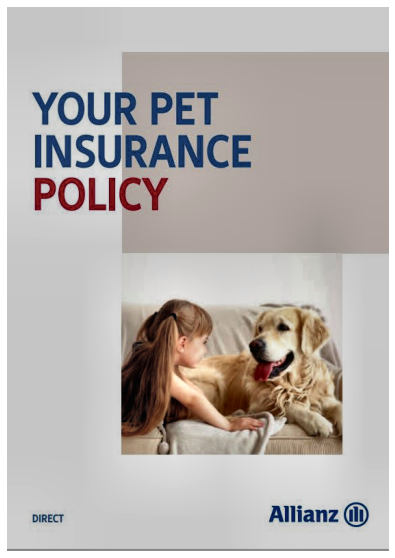

In [8]:
augmented_image = light(image=image)['image']
visualize(augmented_image)

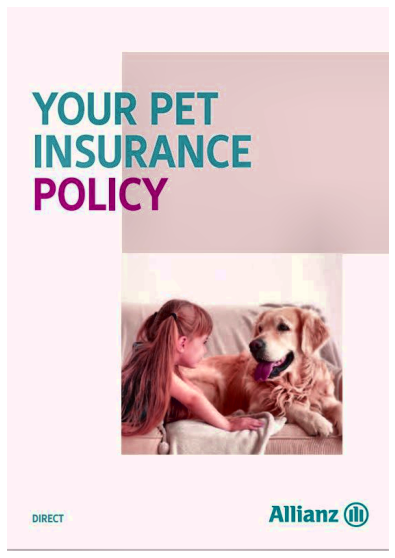

In [9]:
augmented_image = medium(image=image)['image']
visualize(augmented_image)

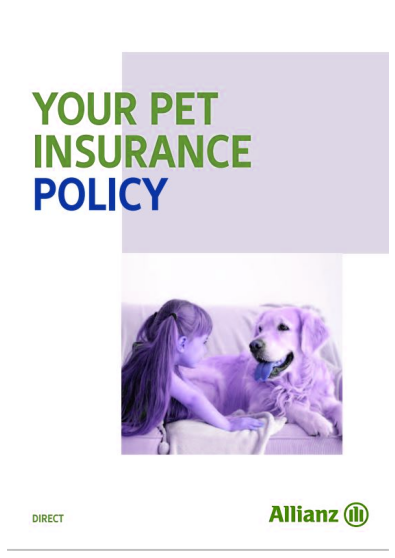

In [10]:
augmented_image = strong(image=image)['image']
visualize(augmented_image)

In [ ]:
multiple_json={
  "images": [
    {
      "width": 1200,
      "height": 1697,
      "id": 0,
      "file_name": "images\\9/47314437-0af4724b-3.fake-certificate-xprofit-ltd.jpg"
    }
  ],
  "categories": [
    {
      "id": 0,
      "name": "Allianz"
    }
  ],
  "annotations": [
    {
      "id": 0,
      "image_id": 0,
      "category_id": 0,
      "segmentation": [],
      "bbox": [
        251,
        1194,
        190,
        36
      ],
      "ignore": 0,
      "iscrowd": 0,
      "area": 6840
    },
    {
      "id": 1,
      "image_id": 0,
      "category_id": 0,
      "segmentation": [],
      "bbox": [
        486,
        1007,
        179,
        19
      ],
      "ignore": 0,
      "iscrowd": 0,
      "area": 3401
    }
  ],
  "info": {
    "year": 2022,
    "version": "1.0",
    "description": "",
    "contributor": "Label Studio",
    "url": "",
    "date_created": "2022-06-11 21:26:00.757331"
  }
}

In [ ]:
base_annotation={"images":[{"width": 558, "height": 796, "id": 45, "file_name": "/content/train/15d73cc8-12.pet-policy-document-0619.copy.jpeg"}],"categories": [{"id": 0, "name": "Allianz"}], "annotations":
[{"id": 45, "image_id": 45, "category_id": 0, "segmentation": [], "bbox": [381, 714, 153, 54], "ignore": 0, "iscrowd": 0, "area": 8262}],"info": {"year": 2022, "version": "1.0", "description": "", "contributor": "Label Studio", "url": "", "date_created": "2022-06-09 07:44:26.656952"}}

In [ ]:
width= 558
height= 796
id=45
file_name= "/content/train/15d73cc8-12.pet-policy-document-0619.copy.jpeg"
bbox =[381, 714, 153, 54]

In [ ]:
153*54
categories= [{'id': 0, 'name': 'Allianz'}]
info={'contributor': 'Label Studio',
  'date_created': '2022-06-09 07:44:26.656952',
  'description': '',
  'url': '',
  'version': '1.0',
  'year': 2022}
def add_differ_annotate_coco(base_annotation,bbox,id,file_name,height,width):
  base_annotation["images"].append({"width": width, "height": height, "id": id, "file_name": file_name})
  base_annotation["annotations"].append({"id": id, "image_id": id, "category_id": 0, "segmentation": [], "bbox": bbox, "ignore": 0, "iscrowd": 0, "area": height*width})
  return base_annotation
def add_annotation(base_annotation,bbox,id,height,width):
  #base_annotation["images"].append({"width": width, "height": height, "id": id, "file_name": file_name})
  base_annotation["annotations"].append({"id": id, "image_id": id, "category_id": 0, "segmentation": [], "bbox": bbox, "ignore": 0, "iscrowd": 0, "area": height*width})
  return base_annotation

In [ ]:
def add_annotation(base_annotation,bbox,id,height,width):
  #base_annotation["images"].append({"width": width, "height": height, "id": id, "file_name": file_name})
  base_annotation["annotations"].append({"id": id, "image_id": id, "category_id": 0, "segmentation": [], "bbox": bbox, "ignore": 0, "iscrowd": 0, "area": height*width})
  return base_annotation

In [ ]:
base_annotation1

{'annotations': [{'area': 6840,
   'bbox': [251, 1194, 190, 36],
   'category_id': 0,
   'id': 0,
   'ignore': 0,
   'image_id': 0,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 3401,
   'bbox': [486, 1007, 179, 19],
   'category_id': 0,
   'id': 1,
   'ignore': 0,
   'image_id': 0,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []}],
 'categories': [{'id': 0

In [ ]:
base_annotation1=add_annotation(base_annotation1,bbox,id,height,width)

In [ ]:
base_annotation1=add_differ_annotate_coco(base_annotation1,bbox,id,"file_name",height,width)

In [ ]:
base_annotation1

{'annotations': [{'area': 6840,
   'bbox': [251, 1194, 190, 36],
   'category_id': 0,
   'id': 0,
   'ignore': 0,
   'image_id': 0,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 3401,
   'bbox': [486, 1007, 179, 19],
   'category_id': 0,
   'id': 1,
   'ignore': 0,
   'image_id': 0,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bbox': [381, 714, 153, 54],
   'category_id': 0,
   'id': 45,
   'ignore': 0,
   'image_id': 45,
   'iscrowd': 0,
   'segmentation': []},
  {'area': 444168,
   'bb